cd Documents/Github/GA-DAT9-Projects1/R_Morgan_Project4_Files

jupyter nbconvert R_Morgan_Project4_Presentation.ipynb --to slides --post serve



## Project 4: Telecom Churn Prediction Modelling 

### __Rhys Morgan, DAT9__

__20 Oct 2018__

---

__Background:__ For subscription-based telecom providers, retaining customers is a significant priority. Retained customers become more loyal to your service, and provide opportunities for up-selling and cross-promotion.

A Telecoms company with a client base in America has collected data on a selection of its clients (anonymised), focused on customers phone activity and whether they chose to leave their account. They wish to know whether a customer is likely to leave their subscription service, i.e. whether a given customer will churn or not.

__Problem Statement:__ Predict Customer churn, and determine the factors that lead customers to churn, in order to optimise the customer management process, giving us insights into customer retention, increasing lifetime value per customer, and identifying customers with further potential to market to.

__Project Goal:__ Predict whether a customer will churn from the Telecom company's services.

__Null Hypothesis:__ Customer churn is unaffected by independent variables, which present as random chance. Therefore, the probability of a customer churning is 50%.

__H0:__ P = 0.5, +/- 0.05

__Alternate Hypothesis:__ A customer’s chance of churning is affected by an independent variable, resulting in a higher or lower-than-equal probability of a customer churning ('True'). 

__H1:__ P =\= 0.5 +/- 0.05

__Limitations:__ Other factors aside from the phone use data may have contributed to the decision to churn, such as other plan features (e.g. internet use and cost within customers' plans) or reliability metrics (number of service outages etc). Also, we have no data on the nature of the customer service calls, and whether these resulted in a positive or negative experience.

### Data - Features and Target

In our dataset, we have 20 features that describe how a customer uses their telecom package, as well as a target feature indicating whether the customer churned. These features are described below:

1. __state (Categorical, 51 unique values):__ name of state that customer resides in
2. __account_length (integer):__ number of days customer has held their account.
3. __area_code (categorical, 3 unique values):__ 3-digit area code of customer
4. __phone_number (categorical, 5000 unique values):__ phone number of customer
5. __international_plan (categorical, 'Yes' or 'No'):__ whether the customer has an international plan
6. __voice_mail_plan (categorical, 'Yes' or 'No'):__ whether the customer has voice mail plan
7. __num_of_voice_mail_messages (integer):__  number of VM messages made by customer
8. __total_day_minutes (integer):__ Total daytime call minutes used
9. __total_day_calls (integer):__ Total daytime calls made
10. __total_day_charge (float):__ Total charges for daytime calls
11. __total_eve_minutes (integer):__ Total evening call minutes used
12. __total_eve_calls (integer):__ Total evening calls made
13. __total_eve_charge (float):__ Total charges for evening calls
14. __total_night_minutes (integer):__ Total nighttime call minutes used
15. __total_night_calls (integer):__ Total nighttime calls made
16. __total_night_charge (float):__  Total charges for evening calls
17. __total_international_minutes (integer):__ Total international minutes used
18. __total_intl_calls (integer):__ Total international calls made
19. __total_intl_charge (float):__ total charges international calls
20. __number_customer_service_calls (integer):__ calls made to customer service

We also have a target column:

21. __churn (Binary Target Column, 'True' or 'False')__ : whether the customer churned or not (True for churned, False for not churned. 



### __Process:__
In tackling the problem statement of predicting churn, we wish to address the following :

> A.	Create an accurate machine learning model for predicting churn likelihood for a given customer, provided the data for that customer is available.

> B. Determine the most important data features that influence customer churn rate, and therefore optimise our model(s).

Our main business problem is a binary classification problem, in that we're interested in whether a customer falls into one of two categories: whether they churn (1) or don't churn (0)

In this report, I attempt to answer these two problems through the following methodology:

1. Explore the telecom customer dataset, to determine its general characteristics
2. Clean and prepare the data to ensure we can utilise as much information from it as possible.
3. Fit a classification ML model with our dataset, and determine if its accuracy eclipses our baseline accuracy (0.5)
4. Utilise various classification models that determine which features are most important to predicting churn
5. Refit model after removing highlighted features (if any) and measure performance
6. Test other classification models to see if they can improve accuracy.

### Success Metrics:

I used two main metrics to evaluate model effectiveness, __Accuracy Score__ and __Area Under Curve (AUC)__

While both are useful metrics, I place more weight on a model's AUC, as it tests the discrimination ability of the model rather than its calibration, which the accuracy score does. While optimising a model requires calibration (to ensure predicted outcomes match actual outcomes), if it has no ability to discriminate beyond the proportion of recorded outcomes in the data, it isn't of much use.

__Additional note:__ I also feel it important to note the __odds ratios__ for linear models, which are derived from the coefficients of these models. They allow us to determine the association between a feature and likelihood of churning - a larger value equates to a higher likelihood of churn occuring if the feature is present. Naturally, this can aid in determining which features are important for predicting churn.

I performed the final evaluation of all models with a visual comparison of ROC curve, with AUC stated beside. AUC scores for all models were 4-fold cross validated. I determined this number of folds by iterating through different fold numbers to find the optimal score.

### Pre-step: Additional Data preparation

Previously, we performed Exploratory Data Analysis on our data, and converted all columns to numeric values for compatability with scikit-learn. The EDA report can be found here:

https://github.com/RhysZH/GA-DAT9-Projects1/blob/master/R_Morgan_Project4_Files/Project%204%20-%20Telco%20Data%20EDA.ipynb

#### Exploratory Data Analysis

Key Observations:

1. Our 3 'Total_X_minutes' features showed strong positive correlation with 'total_XXX_charge' features. Therefore, I removed the 'minutes' features to eliminate correlating features.


2. Once we converted categorical features to numerical features (through dummy variables and ordinal replacement values), there is a discrepancy in the scaling of each feature. We therefore need to scale our features using __StandardScaler__.


3. Our target feature ('churn') was heavily imbalanced, in that there were far more customers who did not churn vs those who did. We therefore have to re-sample our data so that both '1' and '0' classes are equally represented in the data. We can accomplish this through __SMOTE-Tomek__.

In [1]:
import pandas as pd

data = r"https://raw.githubusercontent.com/RhysZH/GA-DAT9-Projects1/master/R_Morgan_Project4_Files/telecom_data.csv"

#Please ignore - data = r"/Users/meisan/Documents/GitHub/GA-DAT9-Projects1/R_Morgan_Project4_Files/telecom_data.csv"
df = pd.read_csv(data)

In [2]:
#Show 1st five rows to perform cursory check for anomalies in values & shape.
df.head()

,account_length,num_of_voice_mail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_n,voice_mail_plan_n,area_code_408,area_code_415,area_code_510,churn_n
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1,0,1,0,0
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1,0,1,0,0
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,1,0,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2,1,0,1,0,0,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,1,0,0,1,0,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [4]:
#establish list of features saved from EDA, print heatmap to check for colinearity between features
feature_names = ['account_length','num_of_voice_mail_messages','total_day_calls','total_day_charge',
                 'total_eve_calls','total_eve_charge','total_night_calls','total_night_charge',
                 'total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'area_code_408','area_code_415','area_code_510']

#predictors = ['account_length','total_intl_charge','number_customer_service_calls',
              #'total_day_calls','area_code_408','area_code_415','area_code_510']

X = df[feature_names]
y = df['churn_n']

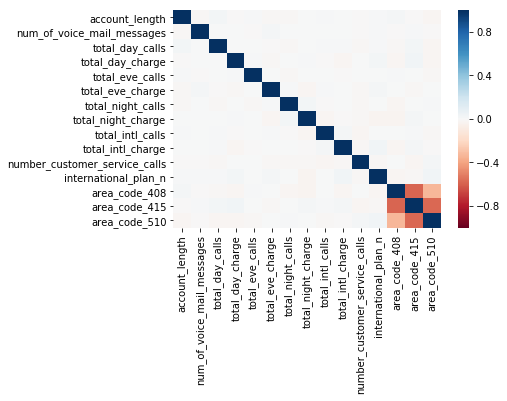

In [5]:
sns.heatmap(X.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

In [6]:
from sklearn.preprocessing import StandardScaler

#Instantiate a StandardScaler Object
ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

#### Use Smote-Tomek to resample data

In [8]:
#import counter to check shapes of original and resampled datasets
from collections import Counter
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=123)
X_res, y_res = smt.fit_sample(Xs, y)

X_samp = pd.DataFrame(X_res, columns = feature_names)

#Compare distributions of old and new datasets.
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4293, 1: 707})
Resampled dataset shape Counter({0: 4292, 1: 4292})


In [9]:
#default settings resulted in heavy use of SMOTE to balance data.

#output of Smote-Tomek are arrays. Convert resampled X & y into Dataframes for utility.
X_samp = pd.DataFrame(X_res, columns = feature_names)
y_samp = pd.DataFrame(y_res, columns = ['churn_n'])

In [10]:
X_samp.shape

(8584, 15)

In [11]:
#check sampled data for anomalies
X_samp.head()

,account_length,num_of_voice_mail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_n,area_code_408,area_code_415,area_code_510
0,0.698941,1.273145,0.502824,1.574074,-0.060077,-0.063849,-0.446928,0.876286,-0.584236,-0.095509,-0.436676,-0.323240,-0.580122,1.002002,-0.576119
1,0.169849,1.346973,1.158422,-0.347082,0.141693,-0.101089,0.154374,1.069818,-0.584236,1.245982,-0.436676,-0.323240,-0.580122,1.002002,-0.576119
2,0.925695,-0.572549,0.704546,1.171286,0.494791,-1.572084,0.204483,-0.746737,0.229917,0.695971,-1.202236,-0.323240,-0.580122,1.002002,-0.576119
3,-0.409634,-0.572549,-1.463971,2.210457,-0.614946,-2.745155,-0.547145,-0.069377,1.044069,-1.329681,0.328885,3.093675,1.723777,-0.998002,-0.576119
4,-0.636388,-0.572549,0.654116,-0.252115,1.100103,-1.034426,1.056327,-0.267307,-0.584236,-0.055264,1.094445,3.093675,-0.580122,1.002002,-0.576119


### Modelling Workflow

In implementing my chosen models, I follow a fixed workflow to systematically create a useable model as well as record the required success metrics:

1. Split telecom data into subsets for training and testing the model
2. Instantiate and fit the model with the training data
3. Create a set of predictions with the testing data
4. Derive predicted probabilities from this testing data(i.e. the probability that a given customer will churn)
5. Use the predicted probabilities and actual binary (0 or 1) labels of the test set to calculate true positive rate, false positive rate and thresholds via Receiver-Operating Characteristics (ROC).
6. Use these metrics to calculate area under curve (AUC), and perform 4-fold cross-validation.
7. Return other success metrics, depending on the model. Includes a confusion matrix, accuracies and coefficients (for linear models).

## Model Selection

In choosing Machine Learning Models to answer our two main business problems (of predicting churn, and determining influential features for prediction), I have selected models that focus on prediction and feature selection. I will be using the following models for each task.

__Classification Models__

1. Logistic Regression Model (Logit)
2. K-Nearest Neighbours
3. Decision Trees


__Classification Models with Feature Selection capabilities__

1. SGDClassifier (ElasticNet Regularisation), 
2. Random Forest Model

For feature selection models, I can refit the logistic regression model based on model results, removing highlighted features to see if success metrics are improved.

We notice that after re-sampling, the number of rows in the data has increased. This is because SMOTE-Tomek heavily favoured SMOTE, which creates new estimated data points to bring the number of churned customers (y='1') up to the number of unchurned customers (y=0).

Next, we will create another correlation heatmap to check if re-sampling affected inter-feature colinearity, requiring further cleaning (from the heatmap, this is not the case).

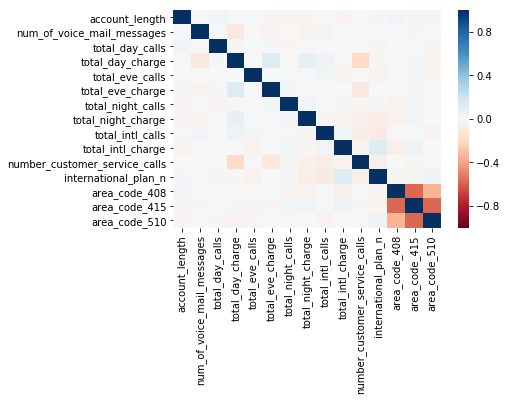

In [12]:
#check to see if sampling has affected colinearity.
sns.heatmap(X_samp.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

### 1. Logistic Regression Modelling

This model will give us a baseline AUC and accuracy score to base further investigation on. Our intial model will use a __80/20 Train/Test split__ on our resampled, scaled dataset. I also derived the optimal k-fold cross-validated AUC from this model in order to find the __optimum number of folds__ for our final cross validation of all models.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# create training and testing vars, check shape
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6867, 15) (6867,)
(1717, 15) (1717,)


In [14]:
# Make an instance of a Logistic Regression object.
lr = LogisticRegression()
type(lr)

#fit model, print coefficients
model = lr.fit(X_train, y_train)
print('---Intercept---')
print(model.intercept_)
print('---Coefficients---')
print(model.coef_)
print('---Odds Ratios---')
print(np.exp(model.coef_))

---Intercept---
[-0.68334051]
---Coefficients---
[[ 0.06034927 -0.46044573  0.04311776  0.77387899 -0.01223031  0.43202967
  -0.06308781  0.25381826 -0.1568363   0.23789095  0.87602113  0.71344466
   0.02847505 -0.03032511  0.00648021]]
---Odds Ratios---
[[1.06220748 0.63100233 1.04406083 2.16816023 0.98784418 1.54038081
  0.93886103 1.28893753 0.85484399 1.26857085 2.4013261  2.04100976
  1.02888434 0.97013008 1.00650125]]


We see that odds ratios for all coefficients are high, meaning that their presence can affect predictions. However, we can perform reliable feature selection with regularisation models.

In [15]:
print(feature_names[3],',',feature_names[10],',',feature_names[11])

total_day_charge , number_customer_service_calls , international_plan_n


In [16]:
#From an initial viewing, the above metrics have higher coefficients associated with them. 

#assign array with predicted 'y' results to 'y_predicted'
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [17]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8555217146998706

In [18]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(model, X_res, y_res, cv=4, scoring='roc_auc').mean()
print('Cross-validated AUC for 1st Logit model is', cv_lr)

Cross-validated AUC for 1st Logit model is 0.8415368239660427


In [19]:
y_pred_train = model.predict(X_train)
print('Logistic Regression Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Logistic Regression Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

Logistic Regression Testing Accuracy: 0.7815958066394875
Logistic Regression Accuracy: 0.7849133537206932
---Confusion Matrix---
[[660 183]
 [192 682]]


#### Initial Observations from  Logit model

Looking at our testing accuracy, it is around 85% accurate, which is a good starting point. It has eclipsed our null accuracy of 50% (from resampling our data with Smote-Tomek), which rejects our null hypothesis.

Our testing and training scores are close, indicating model does not present with overfitting. 

### 2. Elastic Net Regularisation

While our initial Logit model does not show any overfitting, we can use an ElasticNet model to identify features that do not impact the classification model significantly. We can then remove these features and re-fit the Logit model, and record any improvements.

As this is a classification problem, we will use SGDClassifier to apply ElasticNet regularisation (by way of LASSO regularisation). 

We require an optimal list of deprecated features, which neccessitates tuning our regularisation model. To tune, we have to determine the optimal value of the alpha hyper-parameter (which will heavily impact the Lambda hyper-parameter). 

To get an optimal alpha, I have written a program that iterates through a list of alphas, fitting a new model for each. The program then returns the alpha & coefficients of the model with the highest AUC. We then use this alpha to fit a new SGDClassifier model to get our final coefficients, which tell us which features we can remove for further modelling.

In [ ]:
from sklearn.linear_model import SGDClassifier


#define a range of alphas for optimising enet
alpha_range = 10.**np.arange(-2, 3)

opt_auc = 0

In [20]:
#find optimal auc through optimal alpha, use coefficients for feature selection
for n in alpha_range:
    clf = SGDClassifier(penalty='elasticnet',alpha=n,max_iter=1000, loss = 'log',random_state=123)
    clf_model = clf.fit(X_train, y_train)
    predicted_enet = clf.predict_proba(X_test)
    preds = predicted_enet[:,1]
    fpr_enet, tpr_enet, threshold_enet = metrics.roc_curve(y_test, preds)
    roc_auc_enet = metrics.auc(fpr_enet, tpr_enet)

    #determine the optimum alpha by storing 'n' and its 
    #associated metrics if AUC is larger than AUC for previous n.
    if roc_auc_enet >= opt_auc:
        opt_preds = preds
        opt_auc = roc_auc_enet
        opt_int = clf.intercept_
        opt_coef = clf.coef_
        opt_alpha = n
print('AUC for optimal alpha: ', opt_auc)    
print('Optimal alpha: ', opt_alpha)    
print('Intercept: ', opt_int)
print('coefficients: ',opt_coef)

AUC for optimal alpha:  0.8556031499140859
Optimal alpha:  0.01
Intercept:  [-0.61357972]
coefficients:  [[ 0.04362697 -0.40886348  0.03083594  0.69823179  0.          0.38294732
  -0.0473364   0.22019008 -0.13755107  0.20488582  0.78566804  0.65239969
   0.01523696 -0.02900043  0.        ]]


### Elastic net feature removal
elastic net regularisation deprecated the following features:

__1. 'total_eve_calls'__

__2. 'area_code_510'__

We will note these features, and re-fit our enet model with the optimal alpha, observing AUC.

In [21]:
#Instantiate, fit and predict using a logistic elasticnet model.
clf_2 = SGDClassifier(penalty='elasticnet',alpha=0.01,max_iter=1000, loss = 'log',random_state=123)
clf_model_2 = clf_2.fit(X_train, y_train)
predicted_enet_2 = clf_2.predict_proba(X_test)
print('---Intercept---')
print(clf_model_2.intercept_)
print('---Coefficients---')
print(clf_model_2.coef_)
print('---Odds Ratios---')
print(np.exp(clf_model_2.coef_))

---Intercept---
[-0.61357972]
---Coefficients---
[[ 0.04362697 -0.40886348  0.03083594  0.69823179  0.          0.38294732
  -0.0473364   0.22019008 -0.13755107  0.20488582  0.78566804  0.65239969
   0.01523696 -0.02900043  0.        ]]
---Odds Ratios---
[[1.04459262 0.66440493 1.03131629 2.01019512 1.         1.46660077
  0.95376649 1.2463136  0.87148984 1.22738492 2.19387204 1.92014306
  1.01535363 0.97141604 1.        ]]


In [22]:
preds = predicted_enet_2[:,1]
fpr_enet_2, tpr_enet_2, threshold_enet_2 = metrics.roc_curve(y_test, preds)
roc_auc_enet_2 = metrics.auc(fpr_enet_2, tpr_enet_2)
roc_auc_enet_2

0.8556031499140859

In [23]:
cv_enet = cross_val_score(clf_model_2, X_res, y_res, cv=4, scoring='roc_auc').mean()
print('Cross-validated AUC for 2nd ElasticNet model is', cv_enet)

Cross-validated AUC for 2nd ElasticNet model is 0.8417226961190067


In [24]:
y_pred = clf_model_2.predict(X_test)
y_pred_train = clf_model_2.predict(X_train)
print('ElasticNet Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('ElasticNet Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

ElasticNet Testing Accuracy: 0.7839254513686663
ElasticNet Training Accuracy: 0.7856414737148683
---Confusion Matrix---
[[660 183]
 [188 686]]


With our optimised elasticnet model (with alpha = 0.01), we see a slight improvement in both testing accuracy and AUC. Improvement is only slight however. This is likely because our model was not initially overfitted.

Next, we shall consider the features that had their coefficients reduced to zero, and use them to re-fit our original Logit model.

### 3. Logit re-fit (removing features reduced from ENET)

From regularisation, I found that the features 'total_eve_calls' and 'area_code_510' did not meaningfully affect our model. Therefore, I removed these features and refit another logit model to see if it affects our success metrics. This 2nd logit model was fitted and evaluated according to the modelling workflow previously stated.

In [25]:
#re-fit model, removing features highlighted from elasticnet


enet_predictors = ['account_length','num_of_voice_mail_messages','total_day_calls','total_day_charge',
                 'total_eve_charge','total_night_calls','total_night_charge',
                 'total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'area_code_408','area_code_415']
#assign enet predictors to balanced X data
X_samp_f = X_samp[enet_predictors]

#split data
X_train, X_test, y_train, y_test = train_test_split(X_samp_f, y_res, test_size=0.2,random_state=123)

In [26]:
lr = LogisticRegression()
model_2 = lr.fit(X_train, y_train)

print('---Intercept---')
print(model_2.intercept_)
print('---Coefficients---')
print(model_2.coef_)
print('---Odds Ratios---')
print(np.exp(model_2.coef_))

---Intercept---
[-0.68341447]
---Coefficients---
[[ 0.05991864 -0.46067446  0.04318374  0.77362579  0.43219535 -0.06329349
   0.25376489 -0.15693301  0.2380569   0.87616967  0.71362143  0.02216336
  -0.03794732]]
---Odds Ratios---
[[1.06175016 0.63085802 1.04412973 2.16761132 1.54063605 0.93866794
  1.28886874 0.85476131 1.26878138 2.40168283 2.04137056 1.02241079
  0.96276366]]


In [27]:
#calculate AUC of new model
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr_2, tpr_2, threshold_2 = metrics.roc_curve(y_test, preds)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
roc_auc_2

0.855561075053408

In [28]:
cv_lr_2nd = cross_val_score(model_2, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
print('Cross-validated AUC for Refitted Logit model is', cv_lr_2nd) 

Cross-validated AUC for Refitted Logit model is 0.841789792491981


In [29]:
y_pred = model_2.predict(X_test)
y_pred_train = model_2.predict(X_train)
print('2nd Logit Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('2nd Logit Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

2nd Logit Testing Accuracy: 0.7833430401863716
2nd Logit Training Accuracy: 0.7846221057230232
---Confusion Matrix---
[[662 181]
 [191 683]]


Observing the scores for this model, though there was slight improvement, the score was not affected significantly from the regularisation and refits - the overall accuracy is still around 78% (without cross-validation). 

Ideally, our prediction accuracy should be around 95% (though this isn't the only metric of value). To achieve this, I fit the telecom data to non-linear models to see if other approaches could improve the success metrics, and therefore predict churn more accurately.

### 4. K-fold cross validation on original Logit model

Using the 2nd logit model, I cross-validated its accuracy score multiple times using K-fold cross-validation, iterating through a loop that assigned the number of folds used for cross-validation. It then returned the best score, along with its corresponding value for K, which was 4. 

This was the number of folds I used in cross validation, which justifies the number of folds I used as non-arbitrary.

no_folds    4.000000
scores      0.785531
Name: 2, dtype: float64


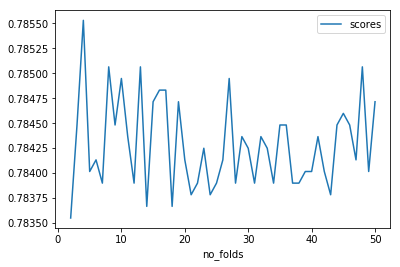

In [30]:
from sklearn.model_selection import cross_val_predict


score_list = []
no_folds = []
for k in range(2,51):
    predicted = cross_val_predict(model_2, X_samp_f, y_res, cv=k)
    score = metrics.accuracy_score(y_res, predicted)
    no_folds.append(k)
    score_list.append(score)

s = {'no_folds':no_folds, 'scores':score_list}
n_scores = pd.DataFrame(s)
print(n_scores.iloc[n_scores['scores'].values.argmax()])

#show cross-val scores against number of folds, visualising optimum k-value.
n_scores.plot('no_folds', 'scores')

#### Optimal number of folds is 4. 

This was recorded for use for final cross-validation.

### 5. K-Nearest Neighbour Classification 

K-Nearest Neighbour (KNN) classifies data based on the classes of the datapoints that are closest to it (in other words, their neighbours. This approach does not attempt to create a linear model, and therefore presents an alternative approach to classification, that could be a better fit for this data. Again, I modelling the telecom data based on my previous workflow, creating a set of predicted classes from test dataset to compare against the actual values from that same test data.

The main variable that we can tune in the KNN model is the number of neighbours we compare a given datapoint to in order to classify it. To find the optimum number of neighbours (n), I used a variation of the program I wrote for finding the optimum number of folds in K-fold cross-validation.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#looped function for calculating accuracy for various neighbours

knn_acc           0.950495
num_neighbours    2.000000
Name: 0, dtype: float64


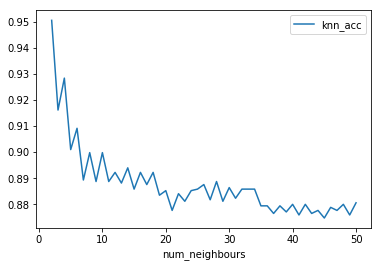

In [32]:
knn_acc = []
num_neighbours = []

for n in range(2,51):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn_model = knn.fit(X_train, y_train)
    predicted_knn = knn_model.predict(X_test)
    knn_acc.append(accuracy_score(y_test, predicted_knn))
    num_neighbours.append(n)
    
#create DataFrame of scores and num_neighbours, plot.    
s = {'knn_acc':knn_acc, 'num_neighbours':num_neighbours}
knn_scores = pd.DataFrame(s)
print(knn_scores.iloc[knn_scores['knn_acc'].values.argmax()])
knn_scores.plot('num_neighbours', 'knn_acc')

#### Optimal number of neighbours is 2. I therefore fit another KNN model using n = 2 for computing ROC & AUC.

In [33]:
knn_13 = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(X_train, y_train)
predicted_knn = knn.predict_proba(X_test)
preds = predicted_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, preds)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_knn

0.9429878851546319

In [34]:
cv_knn = cross_val_score(knn_model, X_res, y_res, cv=4, scoring='roc_auc').mean()
print('Cross-validated AUC for KNN model is', cv_knn)

Cross-validated AUC for KNN model is 0.9256208477333586


In [35]:
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print('KNN Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('KNN Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

KNN Testing Accuracy: 0.8806057076295865
KNN Training Accuracy: 0.8572884811416922
---Confusion Matrix---
[[708 135]
 [ 70 804]]


The confusion matrix shows a larger number of true positives and true negatives, which are reflected in a high AUC and improved accuracy. 

### 6. Decision Tree Model

The decision tree model attempts to classify customers (datapoints) by creating a logic for classification based on the most important attributes of each customer. It continually splits data into subsets if it cannot classify them by a given attribute, and attempts to find another attribute that lets it classify successfully.

In [36]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()

#instantiate decision tree model
dtree_model = clf_tree.fit(X_train, y_train)
predicted_tree = clf_tree.predict_proba(X_test)
preds = predicted_tree[:,1]

#calculate ROC metrics and AUC
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test, preds)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)
roc_auc_tree

0.9331165799381634

In [37]:
cv_dtree = cross_val_score(dtree_model, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
print('Cross-validated AUC for Decision Tree model is', cv_dtree)

Cross-validated AUC for Decision Tree model is 0.9114631873252563


In [38]:
import graphviz 
dot_data = tree.export_graphviz(dtree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("Telco Churn") - commented out to avoid generating new file.
#Follow link to view complete decision tree. A sample is attached below.
Telco_Decision_tree = 'https://github.com/RhysZH/GA-DAT9-Projects1/blob/master/R_Morgan_Project4_Files/Telco%20Churn.pdf'

In [39]:
y_pred = dtree_model.predict(X_test)
y_pred_train = dtree_model.predict(X_train)
print('Decision Tree Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Decision Tree Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

Decision Tree Testing Accuracy: 0.9330227140361095
Decision Tree Training Accuracy: 1.0
---Confusion Matrix---
[[791  52]
 [ 63 811]]


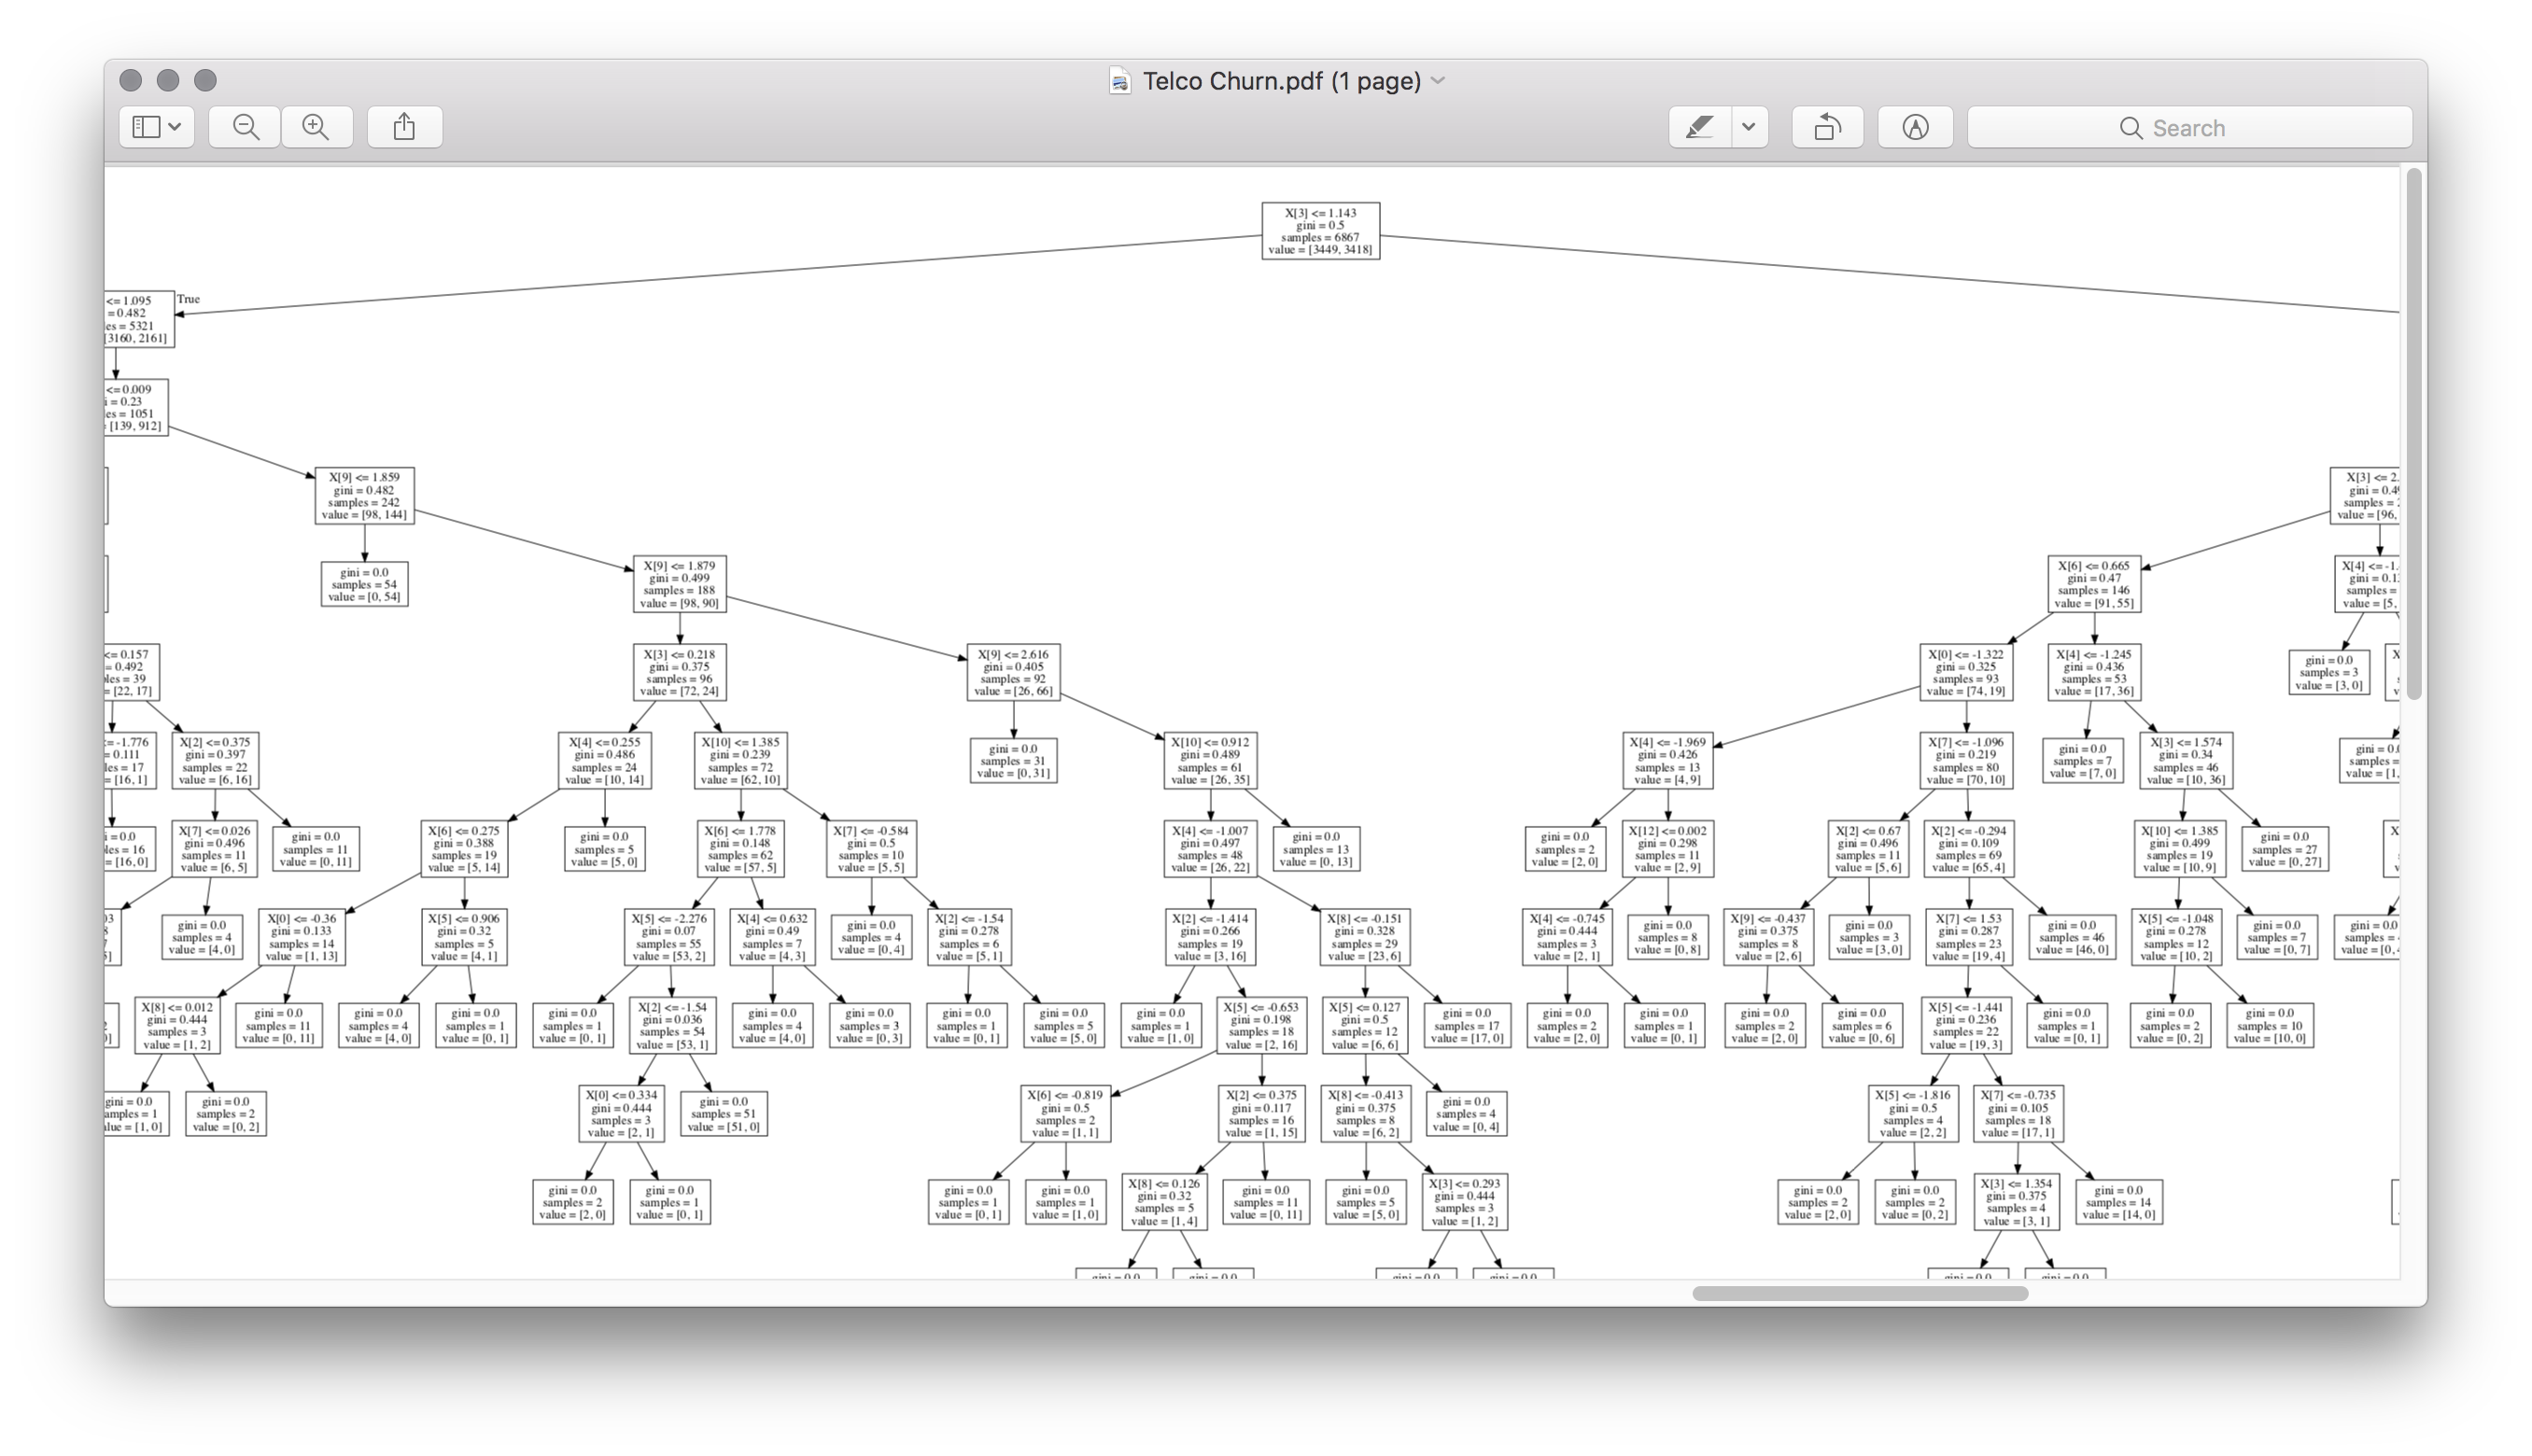

In [40]:
#from observing chart, print features at the top of the decision tree.
print(enet_predictors[3],',',enet_predictors[7],',',enet_predictors[9],',',enet_predictors[10])

total_day_charge , total_intl_calls , number_customer_service_calls , international_plan_n


From the decision tree visualisation, the model decided that the __total_day_charge , total_intl_calls , number_customer_service_calls__ and __international_plan_n__ features were the most significant attribute. It split the dataset according to a threshold value of total day charge, and continued to split in this fashion.

According to the accuracy and AUC, this model outperforms our linear logit models as well as KNN, having more discriminating ability as well as predictive accuracy on test data, which has risen to 93%. 

### 7-a. Random Forest Model

The random forest model essentially generates a large number of decision trees, then classifies data based on the most common resulting class of all the trees. However, my reason for using this model was for its ability to assign each data feature a rating of its importance towards determining churn. This will allow me to determine which features are most important for the telecom business to focus on refining and promoting to reduce churn.

I first evaluated the model as a classification model, then used the attribute __feature importances___ to collect and chart the importance of each feature.

In [ ]:
#split data according to original dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=123)

from sklearn.ensemble import RandomForestClassifier

#Instantiate a Random Forest Classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

In [41]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


#Train the model using the training sets 

rf_model = rf_clf.fit(X_train,y_train)

rf_pred_prob = rf_model.predict_proba(X_test)
preds = rf_pred_prob[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_rf

0.9944949795190435

In [42]:
cv_rf = cross_val_score(rf_model, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
print('AUC for Random Forest model:', roc_auc_rf)
print('Cross-validated AUC for Random Forest model:', cv_rf)

#Our cross-validate AUC is very close to 1, meaning this model has very high discrimation ability. 

AUC for Random Forest model: 0.9944949795190435
Cross-validated AUC for Random Forest model: 0.9932507345858569


In [43]:
rf_y_pred = rf_clf.predict(X_test)
rf_pred_train = rf_clf.predict(X_train)
print('RandForest Testing Accuracy:', metrics.accuracy_score(y_test, rf_y_pred))
print('RandForest Training Accuracy:',metrics.accuracy_score(y_train, rf_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

RandForest Testing Accuracy: 0.9621432731508445
RandForest Training Accuracy: 1.0
---Confusion Matrix---
[[822  21]
 [ 44 830]]


### 7-b. Feature Importance from Random Forest

By plotting the attribute 'feature_importance' from our RF Model, we can ascertain which features were influential in predicting churn for the largest number of customers.

In [44]:
feature_imp = pd.Series(rf_model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

total_day_charge                 0.221256
number_customer_service_calls    0.181544
international_plan_n             0.103963
total_intl_calls                 0.083271
total_eve_charge                 0.076714
total_intl_charge                0.056308
total_night_charge               0.053405
num_of_voice_mail_messages       0.044323
account_length                   0.041572
total_night_calls                0.040122
total_eve_calls                  0.039946
total_day_calls                  0.039022
area_code_415                    0.006980
area_code_510                    0.006011
area_code_408                    0.005565
dtype: float64

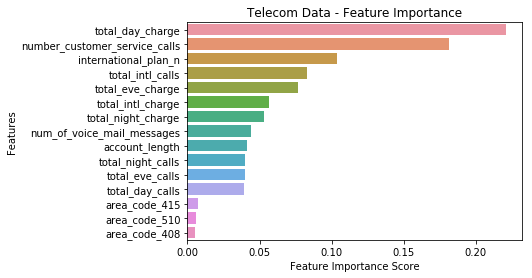

In [45]:
# Create a bar plot for feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Telecom Data - Feature Importance")
plt.show()

From observation of feature importances, our most influential features are the same as those for our decision tree. Feature importance ranks each feature by the percentage of datapoints that a given feature influenced their classification. Note that this does not imply causation only that a relationship exists.

Our three 'area_code' features have little impact on our model, so we can remove them and re-fit a final logit model to see if AUC improves.

### 8. Final Logit Model, removing features below 2% importance

In [46]:
rf_predictors = ['account_length','num_of_voice_mail_messages','total_day_calls',
                 'total_day_charge','total_eve_charge','total_night_calls',
                 'total_night_charge','total_intl_calls','total_intl_charge',
                 'number_customer_service_calls','international_plan_n']
#assign RandomForest predictors to balanced X data
X_samp_randf = X_samp[rf_predictors]

#split data
X_train, X_test, y_train, y_test = train_test_split(X_samp_randf, y_res, test_size=0.2,random_state=123)

In [47]:
lr_3 = LogisticRegression()
model_3 = lr_3.fit(X_train, y_train)

print('---Intercept---')
print(model_3.intercept_)
print('---Coefficients---')
print(model_3.coef_)
print('---Odds Ratios---')
print(np.exp(model_3.coef_))

---Intercept---
[-0.68226722]
---Coefficients---
[[ 0.06175888 -0.45967446  0.04204446  0.77321414  0.43409925 -0.06535415
   0.2517267  -0.15573256  0.23431221  0.87546184  0.71438772]]
---Odds Ratios---
[[1.06370584 0.63148919 1.04294085 2.16671922 1.54357206 0.93673566
  1.28624446 0.85578803 1.26403908 2.39998345 2.04293546]]


In [48]:
#calculate AUC of new model
probs = model_3.predict_proba(X_test)
preds = probs[:,1]
fpr_3, tpr_3, threshold_3 = metrics.roc_curve(y_test, preds)
roc_auc_3 = metrics.auc(fpr_3, tpr_3)
roc_auc_3

0.8559261762638066

In [49]:
#cross-validate AUC
cv_lr_3rd = cross_val_score(model_3, X_samp_randf, y_res, cv=4, scoring='roc_auc').mean()
print('AUC for Final Logit model is', roc_auc_3)
print('Cross-validated AUC for Final Logit is', cv_lr_3rd)

AUC for Final Logit model is 0.8559261762638066
Cross-validated AUC for Final Logit is 0.8418178035991449


In [50]:
y_pred = model_3.predict(X_test)
y_pred_train = model_3.predict(X_train)
print('Final Logit Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Final Logit Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

#Again, our scores improved only slightly, therefore supporting that Logistic regression is likely a sub-optimal fit for our business data and problem.

Final Logit Testing Accuracy: 0.7897495631916133
Final Logit Training Accuracy: 0.7830202417358381
---Confusion Matrix---
[[665 178]
 [183 691]]


### 9. Plot ROC and AUC for all models
I've opted to present all cross-validated AUC's and their associated ROC curves for all models at once, to faciliate direct comparison.

Text(0.5,0,'False Positive Rate')

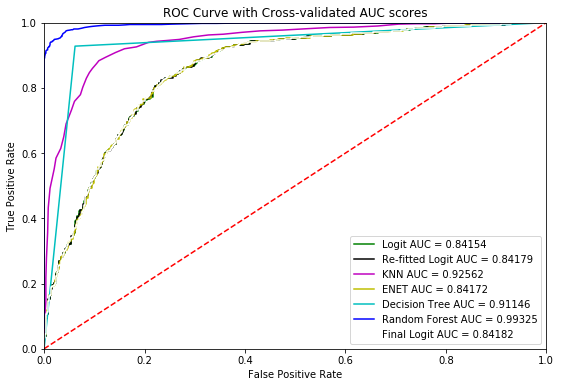

In [51]:
#Plot AUC for all models
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('ROC Curve with Cross-validated AUC scores')
plt.plot(fpr, tpr, 'g', label = 'Logit AUC = %0.5f' % cv_lr)
plt.plot(fpr_2, tpr_2, 'k', label = 'Re-fitted Logit AUC = %0.5f' % cv_lr_2nd)
plt.plot(fpr_knn, tpr_knn, 'm', label = 'KNN AUC = %0.5f' % cv_knn)
plt.plot(fpr_enet_2, tpr_enet_2, 'y', label = 'ENET AUC = %0.5f' % cv_enet)
plt.plot(fpr_tree, tpr_tree, 'c', label = 'Decision Tree AUC = %0.5f' % cv_dtree)
plt.plot(fpr_rf, tpr_rf, 'b', label = 'Random Forest AUC = %0.5f' % cv_rf)
plt.plot(fpr_3, tpr_3, 'w', label = 'Final Logit AUC = %0.5f' % cv_lr_3rd)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusions

From our 7 models (5 different types), the Random Forest model displayed both the highest accuracy and AUC. We can therefore use this model on to predict if new customers will churn, based on new customer data as it is collected.

While Logistic regression models displayed lower success metrics, the ability to see the coefficients for each metric allows us to see the association of each metric to the target via odds ratios.

### Next Steps

The Random Forest model fitted in this report can now be used to predict churn with a high degree of accuracy, though continuous testing is required as the data is affected by different factors over time. 

We can also use its feature importances as points to investigate on for customer management, lead nurturing and other marketing activities, thereby potentially lowering the rate of churn. However, further investigation is required to determine if these features contribute directly to churn rate.

The logistic regression models may also be able to be improved over time, or by tuning hyperparameters to optimise accuracy, though it appears that Random Forest is already fairly optimised, therfore removing the need for this. A mentioned previously though, Logit Odd Ratios give us an idea of the association of certain features, which may become more useful as the model is optimised.

### Thank You